Importing necessary libraries for EDA

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno
 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder 

Business understanding

MoonLight Energy Solutions aims to develop a strategic approach to significantly enhance its operational efficiency and sustainability through targeted solar investments. As an Analytics Engineer at MoonLight Energy Solutions, the task is to perform a quick analysis of an environmental measurement provided by the engineering team and translate the observation as a strategy report. the analysis should focus on identifying key trends and learn valuable insights that will support your data-driven case - the recommendation based on the statistical analysis and EDA.  In particular, the analysis and recommendation must present a strategy focusing on identifying high-potential regions for solar installation that align with the company's long-term sustainability goals. the report should provide an insight to help realize the overarching objectives of MoonLight Energy Solutions.

Dataset Overview


datasets  sources.
    -data source from: https://energydata.info/dataset/?q=Solar+Radiation+Measurement&vocab_regions=AFR
    -data structure and variable descriptions.
     Each row in the data contains the values for solar radiation, air temperature, relative humidity, barometric pressure, precipitation, wind speed, and wind direction, cleaned and soiled radiance sensor (soiling measurement) and cleaning events.

Describe data structure


In [57]:
data = 'C:/Users/sifra/Downloads/data/data/sierraleone_bumbuna.csv'  
try:
    # Load the CSV file
    df = pd.read_csv(data)
    print("Dataset loaded successfully. Shape:", df.shape)
except FileNotFoundError:
    print(f"Error: The file {data} was not found. Please provide the correct file path.")
    exit()
except Exception as e:
    print(f"Error loading CSV file: {e}")
    exit()

Dataset loaded successfully. Shape: (525600, 19)


In [58]:
print("Data Shape:", df.shape)

Data Shape: (525600, 19)


In [59]:
print("First 10 rows of the dataset:")
print(df.head())

First 10 rows of the dataset:
         Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  10/30/2021 0:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  10/30/2021 0:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  10/30/2021 0:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  10/30/2021 0:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  10/30/2021 0:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [60]:
print("Last 5 rows of the dataset:")
print(df.tail())

Last 5 rows of the dataset:
               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
525595  10/29/2022 23:56 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0     0.0   
525596  10/29/2022 23:57 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0     0.0   
525597  10/29/2022 23:58 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0     0.0   
525598  10/29/2022 23:59 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0     0.0   
525599   10/30/2022 0:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0     0.0   

        WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
525595      0.0  0.0      0.0   999         0            0.0   24.2   24.5   
525596      0.0  0.0      0.0   999         0            0.0   24.2   24.5   
525597      0.0  0.0      0.0  1000         0            0.0   24.1   24.4   
525598      0.0  0.0      0.0  1000         0            0.0   24.1   24.4   
525599      0.0  0.0      0.0  1000         0            0.0   24.1   24.4   

        Comments

In [61]:
#data information
print("\nData Informtion:")
print(df.info())


Data Informtion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB      

Specifying numerical and categorical columns


In [62]:
print("\nSummary Statistics:")
print(df.describe()) # for numerical columns


Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         

In [63]:
#for categorical or boolean columns
print(df.describe(include=['object', 'category', 'bool']))

               Timestamp
count             525600
unique            525600
top     10/29/2022 23:21
freq                   1


In [64]:
numerical_columns = []  
categorical_columns = [] 


if not numerical_columns:
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if not categorical_columns:
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']
Categorical columns: ['Timestamp']


Check for missing values

In [65]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [66]:
# Impute numerical columns using mean
for col in numerical_columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())

In [67]:
for col in categorical_columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after imputation:\n", df.isnull().sum())


Missing values after imputation:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [68]:
# Remove or Correct Outliers (for numerical columns)
if numerical_columns:
    # Identify outliers using z-score
    z_scores = np.abs(stats.zscore(df[numerical_columns]))
    threshold = 3
    outliers = (z_scores > threshold).any(axis=1)
    print("\nOutlier rows (z-score):\n", df[outliers])


Outlier rows (z-score):
                Timestamp    GHI    DNI    DHI   ModA   ModB  Tamb    RH   WS  \
208      10/30/2021 3:29   -1.0   -0.1   -1.1    0.0    0.0  22.2  98.1  0.6   
293      10/30/2021 4:54   -1.0   -0.2   -1.2    0.0    0.0  22.2  97.7  2.0   
596      10/30/2021 9:57  485.2   53.0  417.5  471.8  460.7  24.5  87.8  0.4   
605     10/30/2021 10:06  444.4   27.2  419.3  457.0  445.0  24.7  88.8  0.0   
653     10/30/2021 10:54  814.0  257.0  594.3  878.0  856.0  25.9  85.3  0.5   
...                  ...    ...    ...    ...    ...    ...   ...   ...  ...   
524664   10/29/2022 8:25  185.9    1.2  184.3  151.8  170.2  25.1  95.5  0.0   
524665   10/29/2022 8:26  193.5    1.1  191.9  190.7  184.8  25.2  95.0  0.0   
524811  10/29/2022 10:52  698.5  310.1  433.4  732.2  711.9  30.4  76.6  0.5   
524817  10/29/2022 10:58  807.0  395.6  465.8  851.0  828.0  30.1  78.8  0.8   
524877  10/29/2022 11:58  467.3   87.6  383.0  493.8  480.6  30.4  77.8  1.4   

        WSgus

In [69]:
# Remove outliers
df = df[~outliers].reset_index(drop=True)

In [70]:
#Standardize Data
# Convert categorical text to consistent format (lowercase)
for col in categorical_columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.lower()

In [71]:
#Normalize numerical columns using StandardScaler
if numerical_columns:
    scaler = StandardScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

c:\Users\sifra\Kifiya AI Mastery 5,6&7 - Week 0\.venv\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\sifra\Kifiya AI Mastery 5,6&7 - Week 0\.venv\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\sifra\Kifiya AI Mastery 5,6&7 - Week 0\.venv\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Check for Duplicates

In [80]:
data = pd.read_csv("C:/Users/sifra/Downloads/data/data/sierraleone_bumbuna.csv")  # Fix path if needed
print("\nNumber of Duplicate Rows:", data.duplicated().sum())



Number of Duplicate Rows: 0


In [74]:
#Remove Duplicates
print("\nDuplicate rows before removal:", df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop=True)
print("Duplicate rows after removal:", df.duplicated().sum())


Duplicate rows before removal: 0
Duplicate rows after removal: 0


In [81]:
# Encode Categorical Variables
# Since 'Timestamp' is the only categorical column, do not one-hot encode it.
# Instead, extract useful time features.

if 'Timestamp' in df.columns:
    # Convert to datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    # Extract features
    df['year'] = df['Timestamp'].dt.year
    df['month'] = df['Timestamp'].dt.month
    df['day'] = df['Timestamp'].dt.day
    df['hour'] = df['Timestamp'].dt.hour
    df['minute'] = df['Timestamp'].dt.minute
    # Optionally drop the original column if not needed
    # df = df.drop('Timestamp', axis=1)

In [82]:
#Display the cleaned dataset
print("\nCleaned Dataset:\n", df.head())


Cleaned Dataset:
             Timestamp       GHI       DNI      DHI      ModA      ModB  \
0 2021-10-30 00:01:00 -0.651033 -0.501979 -0.69333 -0.659574 -0.659248   
1 2021-10-30 00:02:00 -0.651033 -0.501979 -0.69333 -0.659574 -0.659248   
2 2021-10-30 00:03:00 -0.651033 -0.501979 -0.69333 -0.659574 -0.659248   
3 2021-10-30 00:04:00 -0.651033 -0.501467 -0.69333 -0.659574 -0.659248   
4 2021-10-30 00:05:00 -0.651033 -0.501979 -0.69333 -0.659574 -0.659248   

      Tamb        RH        WS    WSgust  ...  Cleaning  Precipitation  \
0 -0.97977  0.952171 -0.928946 -1.059569  ...       0.0      -0.125742   
1 -0.97977  0.957302 -0.928946 -1.059569  ...       0.0      -0.125742   
2 -0.97977  0.957302 -0.928946 -1.059569  ...       0.0      -0.125742   
3 -0.97977  0.962434 -0.928946 -1.059569  ...       0.0       7.952785   
4 -0.97977  0.962434 -0.928946 -1.059569  ...       0.0      -0.125742   

      TModA     TModB  Comments  year  month  day  hour  minute  
0 -0.793358 -0.802832    

In [83]:
print("\nCleaned Dataset:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494636 entries, 0 to 494635
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      494636 non-null  datetime64[ns]
 1   GHI            494636 non-null  float64       
 2   DNI            494636 non-null  float64       
 3   DHI            494636 non-null  float64       
 4   ModA           494636 non-null  float64       
 5   ModB           494636 non-null  float64       
 6   Tamb           494636 non-null  float64       
 7   RH             494636 non-null  float64       
 8   WS             494636 non-null  float64       
 9   WSgust         494636 non-null  float64       
 10  WSstdev        494636 non-null  float64       
 11  WD             494636 non-null  float64       
 12  WDstdev        494636 non-null  float64       
 13  BP             494636 non-null  float64       
 14  Cleaning       494636 non-null  float64       
 15  

In [86]:
#Save cleaned dataset to a new CSV file
output_file = 'C:/Users/sifra/Downloads/data/data/sierraleon_clean.csv'
df.to_csv(output_file, index=False)
print(f"\nCleaned dataset saved to {output_file}")


Cleaned dataset saved to C:/Users/sifra/Downloads/data/data/sierraleon_clean.csv


Perform exploratory data analysis (EDA)

In [87]:
data = 'C:/Users/sifra/Downloads/data/data/sierraleon_clean.csv'  

try:
    # Load the CSV file
    df = pd.read_csv(data)
    print("Dataset loaded successfully. Shape:", df.shape)
except FileNotFoundError:
    print(f"Error: The file {data} was not found. Please provide the correct file path.")
    exit()
except Exception as e:
    print(f"Error loading CSV file: {e}")
    exit()

Dataset loaded successfully. Shape: (494636, 24)


I. Univariate Analysis

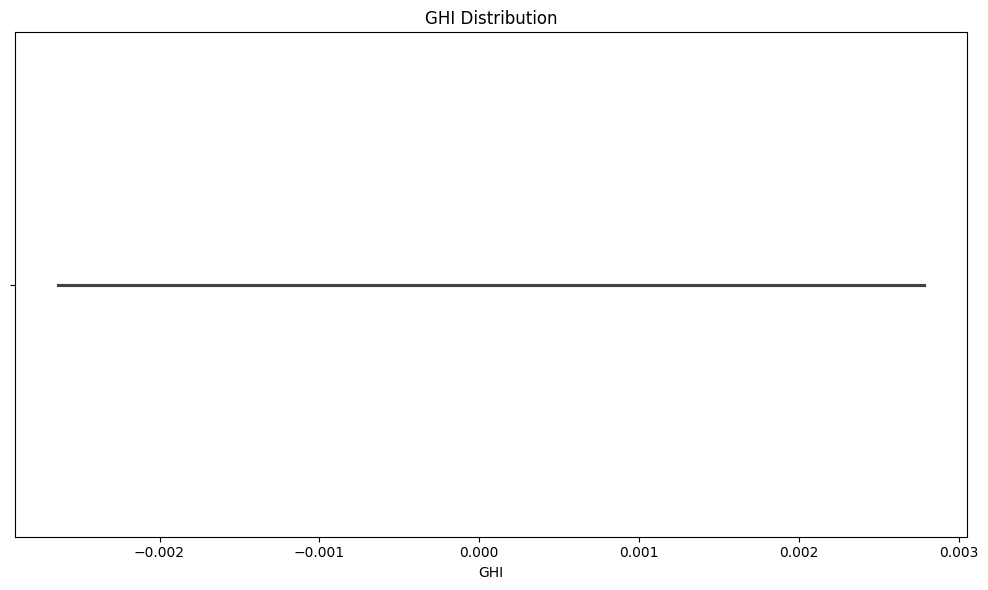

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(x="GHI", data=df)
# Customize the plot
plt.title("GHI Distribution")
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent label cutoff
# Display the plot
plt.show()

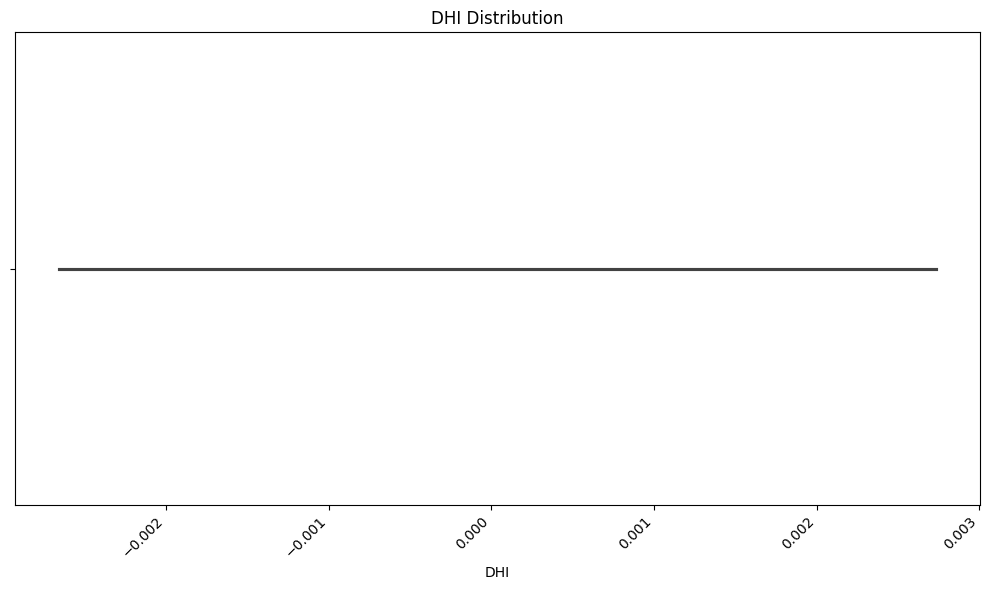

In [89]:
plt.figure(figsize=(10, 6))
sns.barplot(x="DHI", data=df)
# Customize the plot
plt.title("DHI Distribution")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent label cutoff
# Display the plot
plt.show()

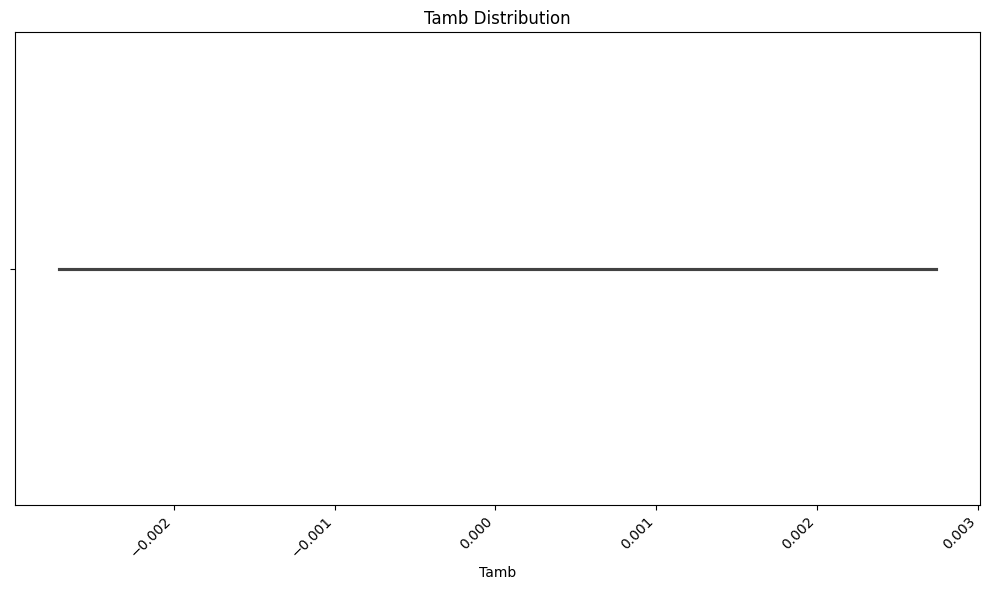

In [90]:

plt.figure(figsize=(10, 6))
sns.barplot(x="Tamb", data=df)
# Customize the plot
plt.title("Tamb Distribution")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent label cutoff
# Display the plot
plt.show()

In [ ]:
### General Overview

This Jupyter Notebook provides a comprehensive workflow for exploratory data analysis (EDA) and preprocessing of a solar energy environmental dataset from MoonLight Energy Solutions. The steps include:

1. **Importing Libraries:** Essential Python libraries for data manipulation, visualization, and preprocessing are imported, such as pandas, numpy, matplotlib, seaborn, and scikit-learn modules.

2. **Data Loading:** The dataset is loaded from a CSV file. Initial checks are performed to ensure the file is read correctly.

3. **Data Inspection:** The structure, shape, and sample records of the dataset are displayed to understand its contents and dimensions.

4. **Data Description:** Summary statistics for both numerical and categorical columns are generated to provide insights into data distribution and types.

5. **Column Identification:** Numerical and categorical columns are programmatically identified for targeted processing.

6. **Missing Value Handling:** The code checks for missing values and imputes them using mean (for numerical columns) and mode (for categorical columns).

7. **Outlier Detection and Removal:** Outliers in numerical columns are identified using the z-score method and removed to ensure data quality.

8. **Data Standardization:** Categorical text columns are standardized (e.g., converted to lowercase), and numerical columns are normalized using `StandardScaler`.

9. **Duplicate Handling:** Duplicate rows are detected and removed to avoid redundancy.

10. **Feature Engineering:** Time-based features (year, month, day, hour, minute) are extracted from the 'Timestamp' column for further analysis.

11. **Data Export:** The cleaned and processed dataset is saved to a new CSV file for future use.

12. **Exploratory Data Analysis (EDA):** Univariate analysis is performed using bar plots to visualize the distribution of key variables such as GHI, DHI, and Tamb.

This workflow ensures the dataset is clean, well-structured, and ready for deeper analysis or modeling, supporting strategic decision-making for solar investments.